# Two variables per item

### Variable width column chart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading csv taken from https://data.world/kgarrett/disney-character-success-00-16
disney=pd.read_csv('disney_movies_total_gross.csv')

#Editing in another variable to get columns we need
disney2=disney.drop(columns=['release_date', 'genre', 'MPAA_rating'])
disney2.head()

,movie_title,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"$184,925,485","$5,228,953,251"
1,Pinocchio,"$84,300,000","$2,188,229,052"
2,Fantasia,"$83,320,000","$2,187,090,808"
3,Song of the South,"$65,000,000","$1,078,510,579"
4,Cinderella,"$85,000,000","$920,608,730"


In [3]:
#Editing to get the columns how we want them
disney2.inflation_adjusted_gross=disney2.inflation_adjusted_gross.str[1:]
disney2.inflation_adjusted_gross=disney2.inflation_adjusted_gross.str.replace(',','')
disney2.inflation_adjusted_gross=disney2.inflation_adjusted_gross.astype(float)
disney2.inflation_adjusted_gross=disney2.inflation_adjusted_gross/1000000
disney2.total_gross=disney2.total_gross.str[1:]
disney2.total_gross=disney2.total_gross.str.replace(',','')
disney2.total_gross=disney2.total_gross.astype(float)
disney2.total_gross=disney2.total_gross/1000000

In [4]:
#Establishing parameters to get only some values, since we don't need all of them to make a distinction
disney3=disney2.loc[(disney2.inflation_adjusted_gross>150) & (disney2.inflation_adjusted_gross<155)]
len(disney3)

4

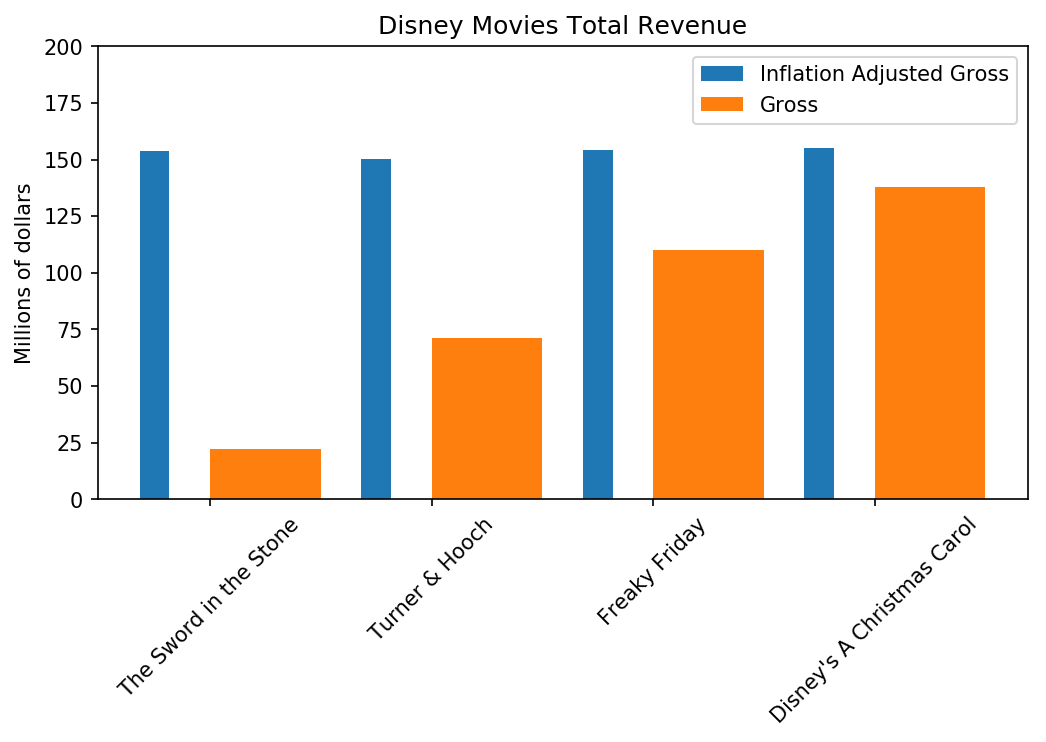

In [5]:
#Plotting
plt.figure(figsize=[8,4],dpi=150)

#This will determine each bar height
height = disney3.inflation_adjusted_gross
height2 = disney3.total_gross

#This will help with the x labels
bars = (disney3.movie_title)

# Choose the position of each barplot on the x-axis 
y_pos = [1,7,13,19]
# Choosing a different width from default (1) to display the difference
width = 3
# The position of the second variable will be given by the sum of the x tick of each element in the first
# variable plus the determined width
y_pos2 = [i + width for i in y_pos]
#This determines the position of the x labels
y_bars=[(y_pos[i]+y_pos2[i])/2 for i in range(len(y_pos))]
# Create bars
plt.bar(y_pos, height)
plt.bar(y_pos2, height2,width=width)
# Create names on the x-axis
plt.xticks(y_bars, bars,rotation=45)
plt.ylim(0,200)

plt.title('Disney Movies Total Revenue')
plt.ylabel('Millions of dollars')
plt.legend(['Inflation Adjusted Gross','Gross'])

# Show graphic
plt.show()


<Figure size 2250x1200 with 0 Axes>

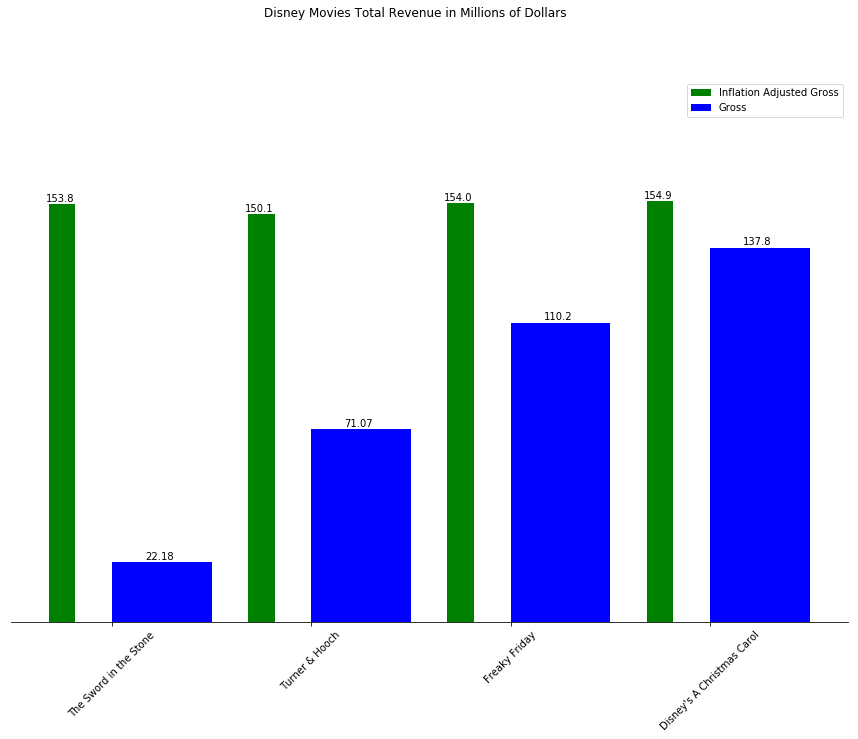

In [23]:
#Plotting like Tufte
plt.figure(figsize=[15,8],dpi=150)

fig, (f) = plt.subplots(1,1)

#This will determine each bar height
height = disney3.inflation_adjusted_gross
height2 = disney3.total_gross

#This will help with the x labels
bars = (disney3.movie_title)

# Choose the position of each barplot on the x-axis 
y_pos = [1,7,13,19]
# Choosing a different width from default (1) to display the difference
width = 3
# The position of the second variable will be given by the sum of the x tick of each element in the first
# variable plus the determined width
y_pos2 = [i + width for i in y_pos]
#This determines the position of the x labels
y_bars=[(y_pos[i]+y_pos2[i])/2 for i in range(len(y_pos))]
# Create bars
f.bar(y_pos, height, color='g')
f.bar(y_pos2, height2, color= 'b',width=width)
# Create names on the x-axis
f.set_xticks(y_bars)
f.set_xticklabels(bars,rotation=45)
f.set_ylim(0,200)

def show_num(y,xtick):
    for i, v in enumerate(y):
        f.text(xtick[i] - .5, v + 1, str(v)[:5])
        
show_num(height,y_pos)
show_num(height2,y_pos2)

#Hiding the y axis
f.get_yaxis().set_visible(False)
#Hiding the all of the frame but the bottom x axis
f.spines['top'].set_visible(False)
f.spines['left'].set_visible(False)
f.spines['right'].set_visible(False)

fig.suptitle('Disney Movies Total Revenue in Millions of Dollars')
f.legend(['Inflation Adjusted Gross','Gross'])

plt.savefig('onlyGraphics/DisneyVWCC.png')
# Show graphic
plt.show()

# One variable per item
## Many categories
### Table or Table with Embedded Charts

In [7]:
#Reading dataset from https://www.inegi.org.mx/app/tabulados/interactivos/default?px=Mortalidad_01&bd=Mortalidad
mortal=pd.read_excel('Mortalidad_01.xlsx',skiprows=4)
mortal.columns=['Estado','Total','Hombres', 'Mujeres','Indefinido']
mortal.head(3)

,Estado,Total,Hombres,Mujeres,Indefinido
0,Total,722611.0,407736.0,314499.0,376.0
1,Aguascalientes,6226.0,3433.0,2792.0,1.0
2,Baja California,20501.0,12888.0,7604.0,9.0


In [8]:
#Cleaning dataset
mortal2=mortal.drop(index=[0])
mortal2=mortal2.drop(columns='Total')
mortal2=mortal2.loc[mortal2.index < 34]
mortal2.Hombres=mortal2.Hombres.astype(int)
mortal2.Mujeres=mortal2.Mujeres.astype(int)
mortal2.Indefinido=mortal2.Indefinido.astype(int)
mortal2=mortal2.sort_values(by=['Hombres'], ascending=False)
mortal2=mortal2.reset_index()
mortal2.loc[mortal2.Estado=='México', 'Estado']= 'Estado de México'
mortal2.head()

,index,Estado,Hombres,Mujeres,Indefinido
0,15,Estado de México,48288,38358,8
1,9,Ciudad de México,32592,30615,6
2,30,Veracruz de Ignacio de la Llave,29005,24388,2
3,14,Jalisco,26712,20377,8
4,11,Guanajuato,20550,15322,8


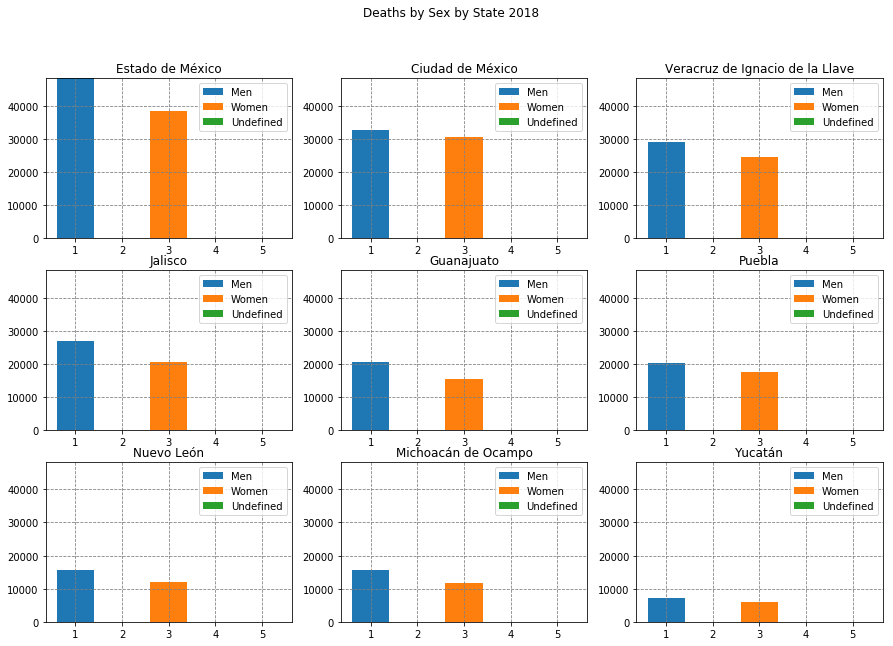

In [9]:
#Setting the size of the main plot
plt.rcParams['figure.figsize']=[15,10]
#Setting the number of subplots (3 by 3 grid) and the name we'll assign it (f)
fig, (f) = plt.subplots(3,3)
#Assigning a title to the main plot
fig.suptitle('Deaths by Sex by State 2018')

l=0
for x in range(3):
    for y in range(3):
        if l==8:
            l=20
        f[x,y].set_title(mortal2.Estado[l])
        f[x,y].set_ylim(0, mortal2.Hombres.max())
        f[x,y].bar(1,mortal2.Hombres[l], label='Men')
        f[x,y].bar(3,mortal2.Mujeres[l], label='Women')
        f[x,y].bar(5,mortal2.Indefinido[l], label='Undefined')
        f[x,y].legend()
        l+=1    
        f[x,y].yaxis.grid(color='gray', linestyle='dashed')
        f[x,y].xaxis.grid(color='gray', linestyle='dashed')

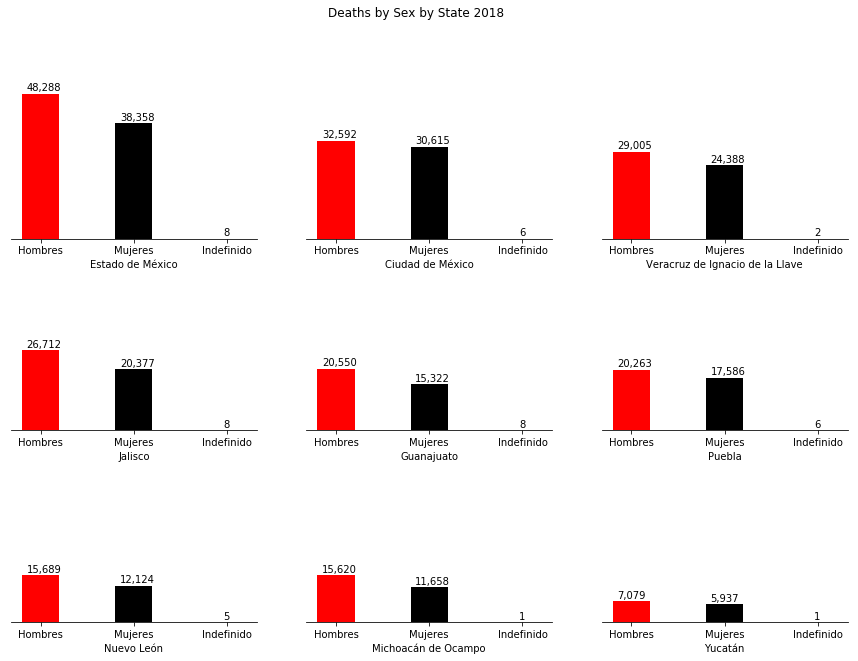

In [10]:
#Setting the size of the main plot
plt.rcParams['figure.figsize']=[15,10]
#Setting the number of subplots (3 by 3 grid) and the name we'll assign it (f)
fig, (f) = plt.subplots(3,3)
#Assigning a title to the main plot
fig.suptitle('Deaths by Sex by State 2018')

def show_num(x,y,y2,xtick):
    for i, v in enumerate(y2):
        a=str(v)
        if len(str(a))>3:
            b=a[:-3]
            c=a[len(b):]
            a=b+','+c
            k=.3
        else:
            k=.075
        f[x,y].text(xtick[i] - k, v + 1000, a)

l=0
for x in range(3):
    for y in range(3):
        if l==8:
            l=20
        f[x,y].set_ylim(0, mortal2.Hombres.max()+5000)
        f[x,y].bar(1,mortal2.Hombres[l], label='Men',color='r')
        f[x,y].bar(3,mortal2.Mujeres[l], label='Women',color='black')
        f[x,y].bar(5,mortal2.Indefinido[l], label='Undefined', color='b')
        f[x,y].set_xlabel(mortal2.Estado[l])
        show_num(x,y,[mortal2.Hombres[l], mortal2.Mujeres[l],mortal2.Indefinido[l]],[1,3,5])
        f[x,y].set_xticks([1,3,5])
        f[x,y].set_xticklabels(['Hombres','Mujeres','Indefinido'])
        l+=1    
        #Hiding the y axis
        f[x,y].get_yaxis().set_visible(False)
        #Hiding the all of the frame but the bottom x axis
        f[x,y].spines['top'].set_visible(False)
        f[x,y].spines['left'].set_visible(False)
        f[x,y].spines['right'].set_visible(False)
        
plt.savefig('onlyGraphics/DeathSexStateTTEC')
plt.show()

# One variable per item
## Few Categories
### Many Items
#### Bar Chart

In [11]:
#Reading csv created from https://www.pro-football-reference.com/leaders/pass_yds_career.htm
qb=pd.read_csv('PassYds.csv')
qb.head(3)

,Quarterback,Total_Career_Yds
0,Drew Brees,76.228
1,Tom Brady,73.456
2,Peyton Manning,71.940


In [12]:
qb2=qb
qb2=qb2.sort_values(by=['Total_Career_Yds'], ascending=True)
qb2.head(3)

,Quarterback,Total_Career_Yds
9,Matt Ryan,49.966
8,John Elway,51.475
7,Eli Manning,56.537


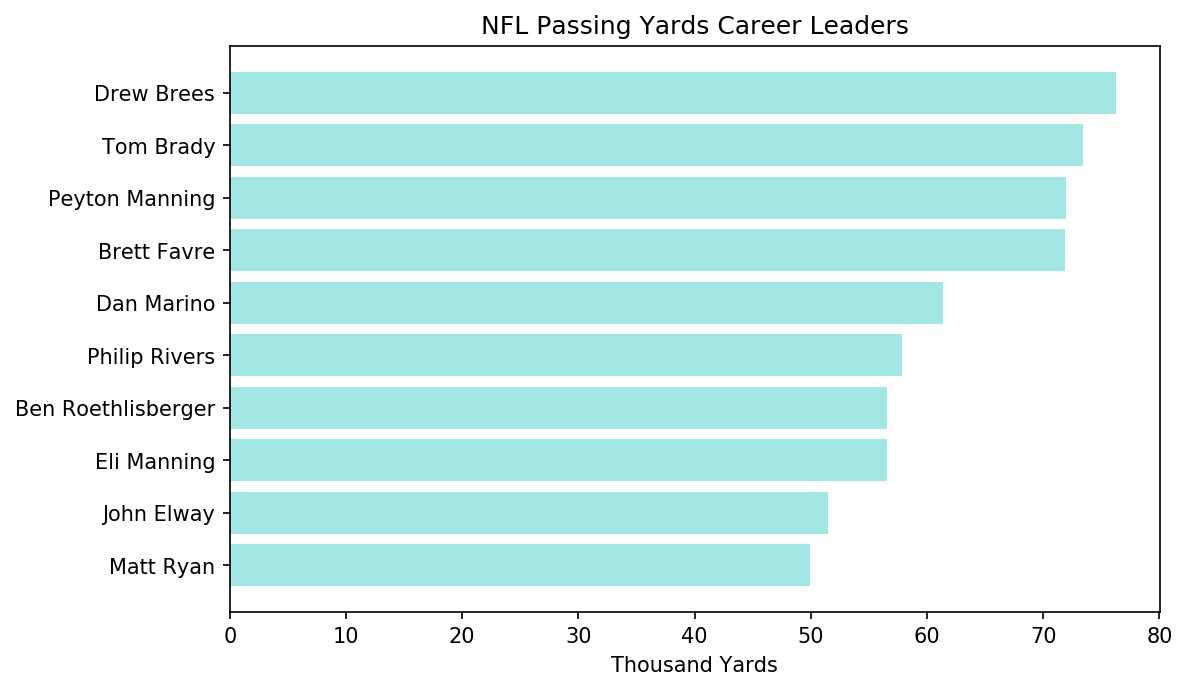

In [13]:
plt.figure(figsize=[8,5],dpi=150)
objects = qb2.Quarterback
y_pos = np.arange(len(objects))
performance = qb2.Total_Career_Yds

plt.barh(y_pos, performance, align='center', alpha=0.5, color='mediumturquoise')

plt.yticks(y_pos, objects)
plt.xlabel('Thousand Yards')
plt.title('NFL Passing Yards Career Leaders')

plt.show()

<Figure size 4000x2500 with 0 Axes>

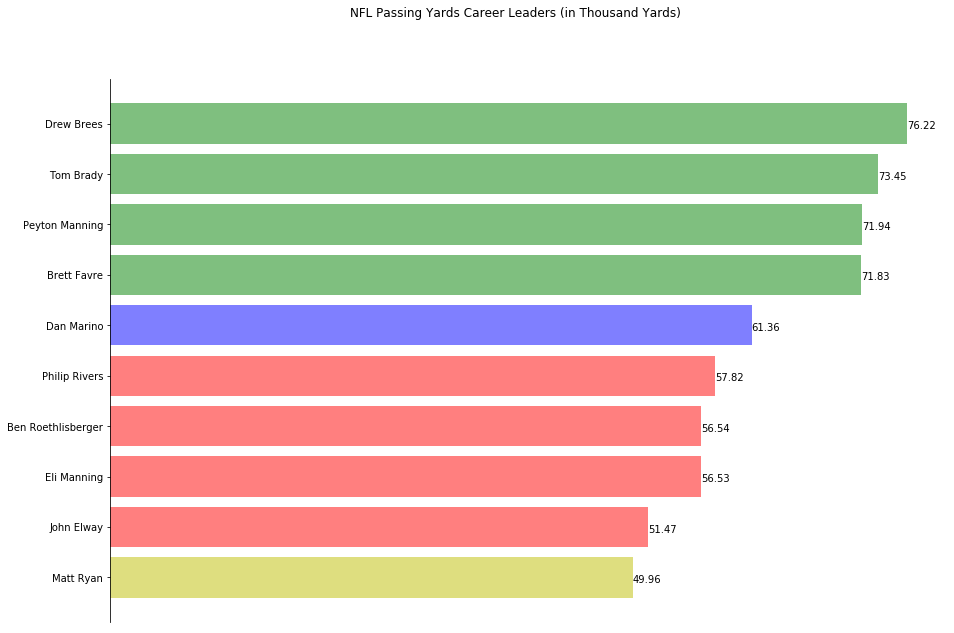

In [14]:
#Tufte
plt.figure(figsize=[8,5],dpi=500)

fig, (f) = plt.subplots(1,1)

#Hiding the y axis
f.get_xaxis().set_visible(False)
#Hiding the all of the frame but the bottom x axis
f.spines['top'].set_visible(False)
f.spines['bottom'].set_visible(False)
f.spines['right'].set_visible(False)

objects = qb2.Quarterback
y_pos = np.arange(len(objects))
performance = qb2.Total_Career_Yds

colors=['y','r','r','r','r','b','g','g','g','g']
f.barh(y_pos, performance, align='center', alpha=0.5, color=colors)

def show_num(y,xtick):
    for i, v in enumerate(y):
        f.text(v, xtick[i]-.1, str(v)[:5])
        
show_num(performance, y_pos)

f.set_yticks(y_pos)
f.set_yticklabels(objects)
fig.suptitle('NFL Passing Yards Career Leaders (in Thousand Yards)')

plt.savefig('onlyGraphics/QBPassBC.png')

plt.show()

# One variable per item
## Few Categories
### Few Items
#### Column Chart

In [15]:
# Reading csv created from http://www.nfl.com/stats/categorystats?archive=false&conference=null&statisticCategory=PASSING&season=2019&seasonType=REG&experience=&tabSeq=0&qualified=false&Submit=Go
qbcomp=pd.read_csv('qb.csv')
qbcomp

,Quarterback,TD,Int,Sacks
0,Lamar Jackson,24,5,20
1,Matt Ryan,20,12,38
2,Tom Brady,15,5,18
3,Patrick Mahomes,19,2,11


In [16]:
qbcomp=qbcomp.sort_values(by=['TD'],ascending=False)
objects=qbcomp.Quarterback
touchdowns=qbcomp.TD
interceptions=qbcomp.Int
sacks=qbcomp.Sacks

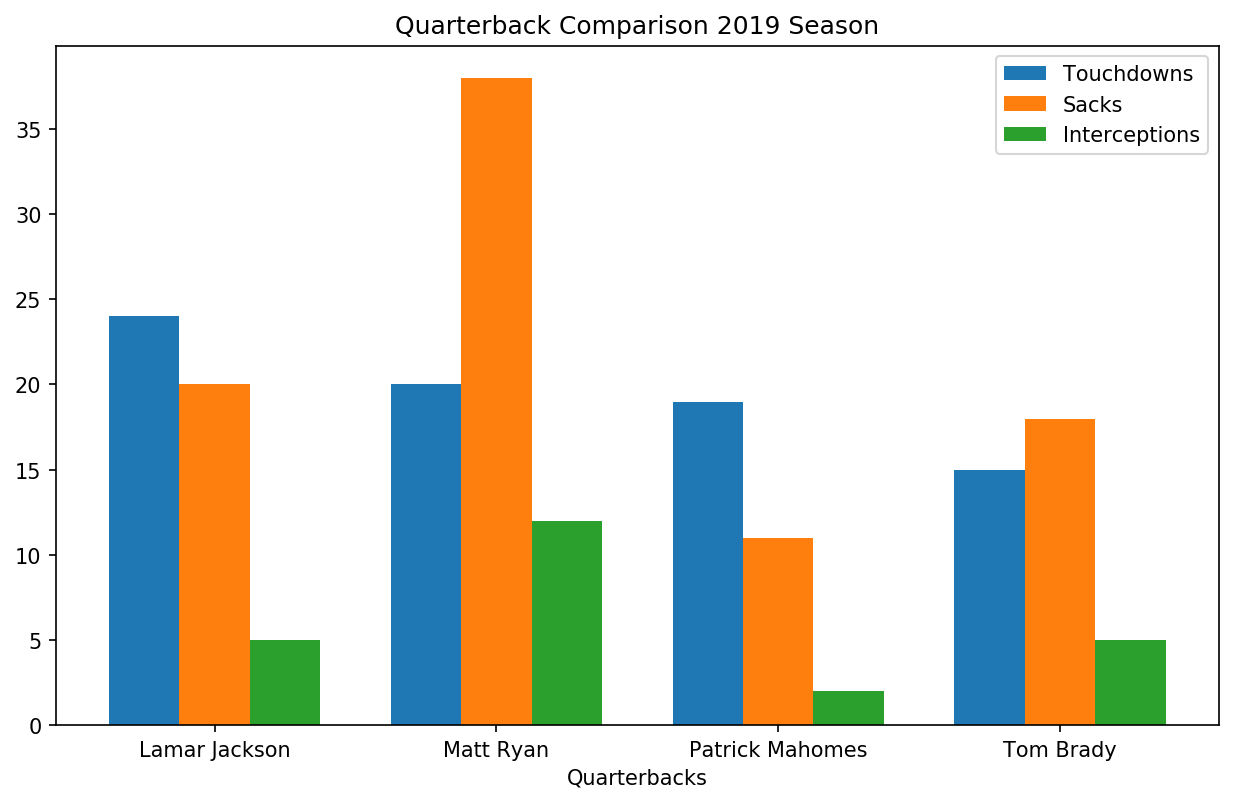

In [17]:
plt.figure(figsize=[10,6],dpi=150)

xpositions=np.arange(len(objects))

width= 0.25
plt.bar(xpositions-width,touchdowns, align='center', label='Touchdowns', width=width)
plt.bar(xpositions,sacks, align='center', label='Sacks', width=width)
plt.bar(xpositions+width,interceptions, align='center', label='Interceptions', width=width)

plt.xticks(xpositions, objects)
plt.legend()
plt.xlabel('Quarterbacks')
plt.title('Quarterback Comparison 2019 Season')

plt.show()


<Figure size 1200x600 with 0 Axes>

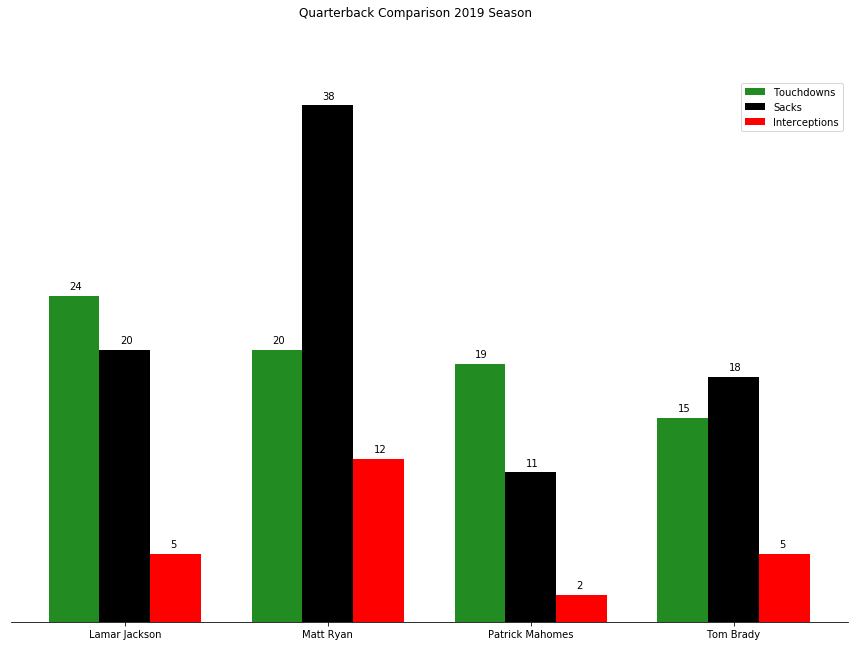

In [18]:
#Tufte plot
plt.figure(figsize=[8,4],dpi=150)

fig, (f) = plt.subplots(1,1)

#Hiding the y axis
f.get_yaxis().set_visible(False)
#Hiding the all of the frame but the bottom x axis
f.spines['top'].set_visible(False)
f.spines['left'].set_visible(False)
f.spines['right'].set_visible(False)

xpositions=np.arange(len(objects))


width= 0.25
f.bar(xpositions-width,touchdowns, align='center', label='Touchdowns', width=width, color='forestgreen')
f.bar(xpositions,sacks, align='center', label='Sacks', width=width, color='black')
f.bar(xpositions+width,interceptions, align='center', label='Interceptions', width=width, color='red')

def show_num(y,xtick):
    for i, v in enumerate(y):
        f.text(xtick[i]-.025, v + .5, str(v)[:5])
        
show_num(touchdowns,xpositions-width)
show_num(sacks,xpositions)
show_num(interceptions,xpositions+width)

f.set_ylim(0,40)
f.set_xticks(xpositions)
f.set_xticklabels(objects)
f.legend()
fig.suptitle('Quarterback Comparison 2019 Season')

plt.savefig('onlyGraphics/QBCCC.png')
plt.show()

In [19]:
qbcomp2=qbcomp.T
qbcomp2.columns=qbcomp.Quarterback
qbcomp2=qbcomp2.drop(index=['Quarterback'])
qbcomp2

Quarterback,Lamar Jackson,Matt Ryan,Patrick Mahomes,Tom Brady
TD,24,20,19,15
Int,5,12,2,5
Sacks,20,38,11,18


In [20]:
objects2=qbcomp2.index
lamar=qbcomp2['Lamar Jackson']
ryan=qbcomp2['Matt Ryan']
mahomes=qbcomp2['Patrick Mahomes']
brady=qbcomp2['Tom Brady']

<Figure size 900x450 with 0 Axes>

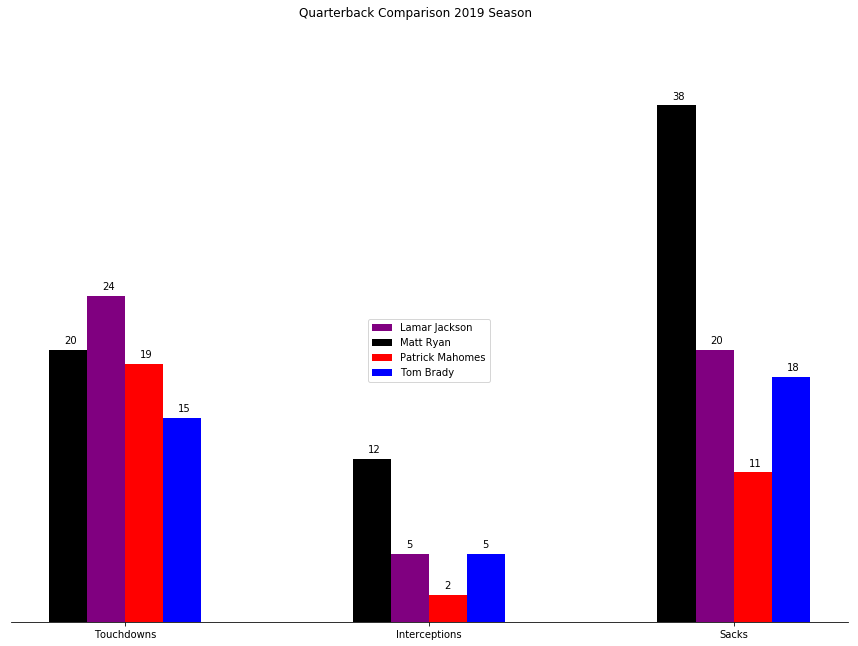

In [22]:
#Tufte plot 2
plt.figure(figsize=[6,3],dpi=150)

fig, (f) = plt.subplots(1,1)

#Hiding the y axis
f.get_yaxis().set_visible(False)
#Hiding the all of the frame but the bottom x axis
f.spines['top'].set_visible(False)
f.spines['left'].set_visible(False)
f.spines['right'].set_visible(False)

xpositions=np.arange(len(objects2))

width= 0.25
xpositions2=np.array([i*2 for i in xpositions])
f.bar(xpositions2-width/2,lamar, align='center', label='Lamar Jackson', width=width, color='purple')
f.bar(xpositions2-1.5*width,ryan, align='center', label='Matt Ryan', width=width, color='black')
f.bar(xpositions2+width/2,mahomes, align='center', label='Patrick Mahomes', width=width, color='red')
f.bar(xpositions2+1.5*width,brady, align='center', label='Tom Brady', width=width, color='blue')

def show_num(y,xtick):
    for i, v in enumerate(y):
        f.text(xtick[i]-.025, v + .5, str(v)[:5])
        
show_num(lamar,xpositions2-width/2)
show_num(ryan,xpositions2-1.5*width)
show_num(mahomes,xpositions2+width/2)
show_num(brady,xpositions2+1.5*width)

f.set_ylim(0,40)
f.set_xticks(xpositions2)
f.set_xticklabels(['Touchdowns','Interceptions','Sacks'])
f.legend(loc='center')
fig.suptitle('Quarterback Comparison 2019 Season')

plt.savefig('onlyGraphics/QBCCC2.png')
plt.show()